안녕하세요 고객님! 요청하신 작업 마무리하여 발송해드립니다.

궁금하신 사항은 언제든 문의해주시길 바라며

결제는 수수료 절감을 위해 직접 거래하는점 양해 부탁드립니다.

입금계좌는 국민은행 58543701003242이며 가격은 150,000원 입니다.

추가적으로 법인사업자의 전자세금계산서 발행을 위해 구매자가 개인인 경우 고객님의 주민등록번호 / 성명 / 이메일 주소를 국세청에서 서류 작성시 기재하여야 합니다.

따라서 주민등록번호 / 성함 / 이메일 주소를 알려주시면 감사하겠습니다!

# Tutorial Exercise: Yelp reviews

## Introduction

This exercise uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- **`yelp.csv`** contains the dataset. It is stored in the repository (in the **`data`** directory), so there is no need to download anything from the Kaggle website.
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.

**Goal:** Predict the star rating of a review using **only** the review text.

**Tip:** After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

## Task 1

Read **`yelp.csv`** into a pandas DataFrame and examine it.

In [2]:
# read yelp.csv using a relative path
import pandas as pd
path = 'yelp.csv'
yelp = pd.read_csv(path)

## Task 2

Create a new DataFrame that only contains the **5-star** and **1-star** reviews.

- **Hint:** [How do I apply multiple filter criteria to a pandas DataFrame?](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb#9.-How-do-I-apply-multiple-filter-criteria-to-a-pandas-DataFrame%3F-%28video%29) explains how to do this.

In [146]:
data = yelp.query('stars in [1, 5]')

In [147]:
data.sample(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
352,NNGJQF3WeIHzGzweCpZ-VA,2010-08-16,ShPQNfKz9k9lZQRrotOKGA,5,The food and service were both amazing. I've h...,review,7yqlOyMgwkBgq0O88a20FA,0,0,0
8957,XMRj865sZBPWCI7tx0uBWw,2008-09-11,X8y2ujS7YxyjFVH13eZsPw,5,"I have to admit, I normally don't like Chinese...",review,FHJUj7EHB9nB2czVOzQX3Q,2,3,0
9282,5VMajxduxfLPSyQkVFKESg,2011-04-01,hAadea0-D3qRGrsLIhHfvw,5,Joe's is truly a special place!! What makes th...,review,SMAiS6Am92JmV8EvxQtPvg,0,1,0
5270,IX5FfZL4P7WGOG-xwdD4wA,2008-12-17,SZQQ4w5fwsVcdACg1Ktq-g,5,Can I review some of the people who go here? B...,review,HpQwQzcJyPrufcC-ub5IXA,3,3,6
1589,jKHRI4bg4fP8zQVpE4jsIQ,2011-08-02,RACmf5ZlaxqhmBcIsGzptQ,5,This is a great hole in the wall shop off of V...,review,FW5o1j_WytQAT6vGgs7tvg,0,0,0
840,YjURbuHKIAQrwQKE8jxszQ,2011-02-28,FpH5-puFe_Bacmfua5oQZQ,5,Woo Hoo! Little Caesars opens in Fountain Hil...,review,_GVAV2LjUWEs9fGjslex_A,1,1,1
270,_pw-OnDpCe9XM0rDVvTUMg,2010-10-22,hi-Z3DzxW10iOHBGVfzhaw,5,I love this location! The food is always great...,review,JniV2vR1TZFBCrdTlIOlNQ,0,2,0
1896,GCs6-N-8CalT4L2_nNas7A,2010-07-06,ezT5Q_vqyYQ0vGg6AGwIjA,5,I have been going here for years. The staff i...,review,St8bDCbyyftkKVhXUssPJg,0,0,0
1052,6oRAC4uyJCsJl1X0WZpVSA,2012-07-24,NiqLX8pW-R2OrnjUxgyXkQ,5,I had the pleasure of living across the street...,review,XpSZrY_Ym8GGx7SNEd0q9g,2,3,2
3635,qzGYgpNThpVDuwYDYbU5pA,2007-07-20,ufCWA2XlR7fS4rC-Y6y4uw,5,I love Coach.\nStylish and trendy without spen...,review,PS0lCxjGNeUrKxYSdpW-Aw,0,0,0


In [148]:
data.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

## Task 3

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the **review text** as the only feature and the **star rating** as the response.

- **Hint:** Keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.

In [149]:
X = data['text']
y = data['stars']

In [150]:
print(f'Type of X is {type(X)}, So we can use CountVectorizer.')

Type of X is <class 'pandas.core.series.Series'>, So we can use CountVectorizer.


In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 706, stratify = y)

In [153]:
X_train.shape[0], X_test.shape[0]

(3268, 818)

## Task 4

Use CountVectorizer to create **document-term matrices** from X_train and X_test.

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
CV = CountVectorizer(max_features = 500)

In [156]:
tr_tdm = CV.fit_transform(X_train)
te_tdm = CV.transform(X_test)

In [157]:
tr_tdm.shape, te_tdm.shape

((3268, 500), (818, 500))

## Task 5

Use multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy** and **print the confusion matrix**.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

In [158]:
from sklearn.naive_bayes import MultinomialNB

In [159]:
clf = MultinomialNB()

In [160]:
clf.fit(tr_tdm, y_train)

MultinomialNB()

In [161]:
pred = clf.predict(te_tdm)

In [172]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

In [163]:
acc = accuracy_score(y_test, pred)

In [164]:
print(f'Accuracy Score is {acc}')

Accuracy Score is 0.9070904645476773


In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

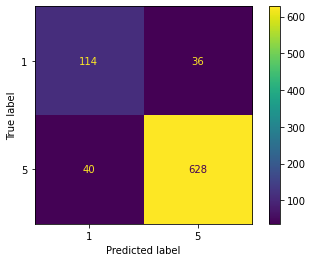

In [123]:
plot_confusion_matrix(clf, te_tdm, y_test)
plt.show()

## Task 6 (Challenge)

Calculate the **null accuracy**, which is the classification accuracy that could be achieved by always predicting the most frequent class.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains null accuracy and demonstrates two ways to calculate it, though only one of those ways will work in this case. Alternatively, you can come up with your own method to calculate null accuracy!

In [124]:
y_test.value_counts()

5    668
1    150
Name: stars, dtype: int64

In [125]:
null_acc = (y_test.value_counts().head(1) / len(y_test))[5]

In [126]:
print(f'Null Accuracy is {null_acc}')

Null Accuracy is 0.8166259168704156


## Task 7 (Challenge)

Browse through the review text of some of the **false positives** and **false negatives**. Based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews?

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [166]:
cm = confusion_matrix(y_test, pred)

In [167]:
cm

array([[114,  36],
       [ 40, 628]])

In [168]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [170]:
FP

36

we incorrectly predicted that they do have diabetes (a "Type I error")

In [171]:
FN

40

we incorrectly predicted that they don't have diabetes (a "Type II error")

Classification Error: Overall, how often is the classifier incorrect?

In [175]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - accuracy_score(y_test, pred))

0.09290953545232274
0.09290953545232272


## Task 8 (Challenge)

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**.

- **Hint:** Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.

In [130]:
import numpy as np

In [134]:
clf.class_count_

array([ 599., 2669.])

In [135]:
y_train.value_counts()

5    2669
1     599
Name: stars, dtype: int64

#### 1-star reviews

In [142]:
most_10_1 = pd.DataFrame({'TOKEN' : CV.get_feature_names(), 'COUNT' : clf.feature_count_[0]})

In [143]:
most_10_1.sort_values(by = 'COUNT', ascending = False).head(10)

,TOKEN,COUNT
411,the,4407.0
18,and,2727.0
429,to,2456.0
460,was,1524.0
218,it,1341.0
287,of,1312.0
159,for,1016.0
410,that,953.0
212,in,949.0
273,my,883.0


#### 5-star reviews

In [144]:
most_10_5 = pd.DataFrame({'TOKEN' : CV.get_feature_names(), 'COUNT' : clf.feature_count_[1]})

In [145]:
most_10_5.sort_values(by = 'COUNT', ascending = False).head(10)

,TOKEN,COUNT
411,the,15037.0
18,and,11040.0
429,to,6858.0
287,of,4857.0
216,is,4751.0
218,it,4492.0
212,in,3722.0
460,was,3717.0
159,for,3562.0
497,you,3182.0


## Task 9 (Challenge)

Up to this point, we have framed this as a **binary classification problem** by only considering the 5-star and 1-star reviews. Now, let's repeat the model building process using all reviews, which makes this a **5-class classification problem**.

Here are the steps:

- Define X and y using the original DataFrame. (y should contain 5 different classes.)
- Split X and y into training and testing sets.
- Create document-term matrices using CountVectorizer.
- Calculate the testing accuracy of a Multinomial Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Print the [classification report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report).

### Define X and y using the original DataFrame. (y should contain 5 different classes.)

In [57]:
# define X and y using the original DataFrame
X = yelp.text
y = yelp.stars

In [58]:
# check that y contains 5 different classes
y.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

### Split X and y into training and testing sets.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 706, stratify = y)

In [63]:
X_train.shape, X_test.shape

((8000,), (2000,))

### Create document-term matrices using CountVectorizer.

In [59]:
CV = CountVectorizer(max_features = 500, lowercase = True)

In [64]:
tr_tdm = CV.fit_transform(X_train)
te_tdm = CV.transform(X_test)

### Calculate the testing accuracy of a Multinomial Naive Bayes model

In [89]:
clf = MultinomialNB()

In [90]:
clf.fit(tr_tdm, y_train)

MultinomialNB()

In [91]:
pred = clf.predict(te_tdm)

In [92]:
acc = accuracy_score(y_test, pred)

In [94]:
print(f'Accuracy is {acc}')

Accuracy is 0.502


### Compare the testing accuracy with the null accuracy.

In [95]:
null_acc = (y_test.value_counts().head(1) / len(y_test))[4]

In [96]:
print(f'Null Accuracy is {null_acc}')

Null Accuracy is 0.3525


### Print the confusion matrix.

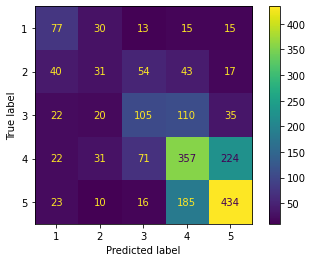

In [105]:
plot_confusion_matrix(clf, te_tdm, y_test)
plt.show()

### Print the classification report

In [97]:
from sklearn.metrics import classification_report

In [103]:
target_names = [f'{x}_star' for x in y_test.unique()]

In [104]:
print(classification_report(y_test, pred, target_names = target_names))

              precision    recall  f1-score   support

      4_star       0.42      0.51      0.46       150
      3_star       0.25      0.17      0.20       185
      5_star       0.41      0.36      0.38       292
      2_star       0.50      0.51      0.50       705
      1_star       0.60      0.65      0.62       668

    accuracy                           0.50      2000
   macro avg       0.44      0.44      0.43      2000
weighted avg       0.49      0.50      0.49      2000

